In [1]:
import pyportlib
pyportlib.set_client_dir()

update = True

## Loading portfolio and benchmark

In [2]:
ptf = pyportlib.Portfolio(account='questrade_tfsa', currency="CAD")
benchmark = pyportlib.Portfolio(account='bench_tfsa', currency='CAD')

q = pyportlib.QuestradeConnection(account_name='tfsa')

2022-03-14 17:27:44,781:ERROR:no market value computed for BPY.UN.TO: in _load_market_value
2022-03-14 17:27:44,813:ERROR:no market value computed for LGND: in _load_market_value


In [3]:
if update:
    q.update_transactions(ptf)
    ptf.update_data(fundamentals_and_dividends=False)
    benchmark.update_data(fundamentals_and_dividends=False)


1 Failed download:
- BPY-UN.TO: No data found, symbol may be delisted


2022-03-14 17:28:26,183:ERROR:no market value computed for BPY.UN.TO: in _load_market_value
2022-03-14 17:28:26,212:ERROR:no market value computed for LGND: in _load_market_value


In [4]:
ptf_rets = ptf.pct_daily_total_pnl(start_date=ptf.start_date, include_cash=False).dropna()
bench_rets = benchmark.pct_daily_total_pnl(start_date=ptf.start_date, include_cash=False).dropna()

2022-03-14 17:28:29,240:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


## Rolling Beta

<AxesSubplot:>

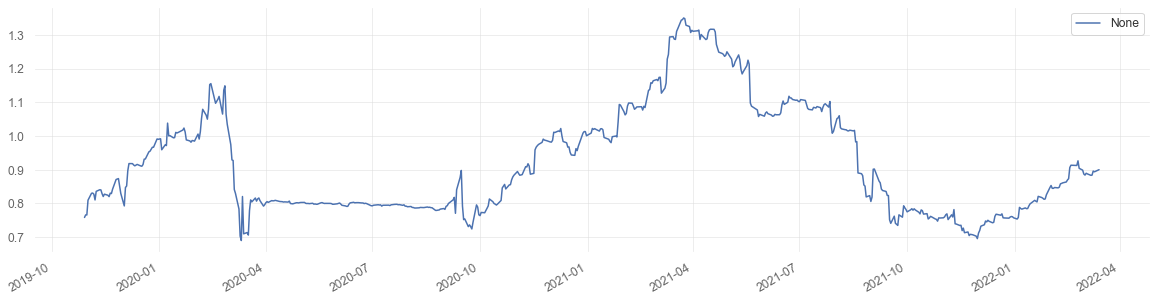

In [5]:
lookback = '4y'
rolling = 126

pyportlib.stats.rolling_beta(ptf_rets, bench_rets, lookback=lookback, rolling_period=rolling).plot(legend=True, figsize=(20,5))

## Rolling Kurtosis

<AxesSubplot:>

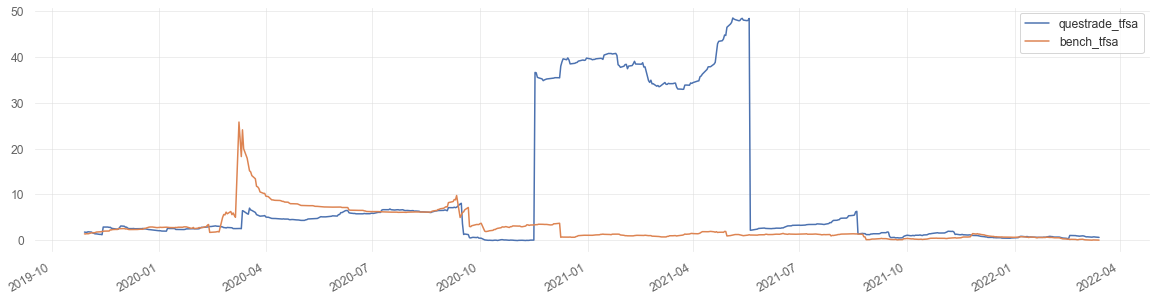

In [6]:
pyportlib.stats.rolling_kurtosis(ptf_rets, lookback=lookback, rolling_period=rolling).plot(legend=True, figsize=(20,5))
pyportlib.stats.rolling_kurtosis(bench_rets, lookback=lookback, rolling_period=rolling).plot(legend=True, figsize=(20,5))

## Rolling Skewness

<AxesSubplot:>

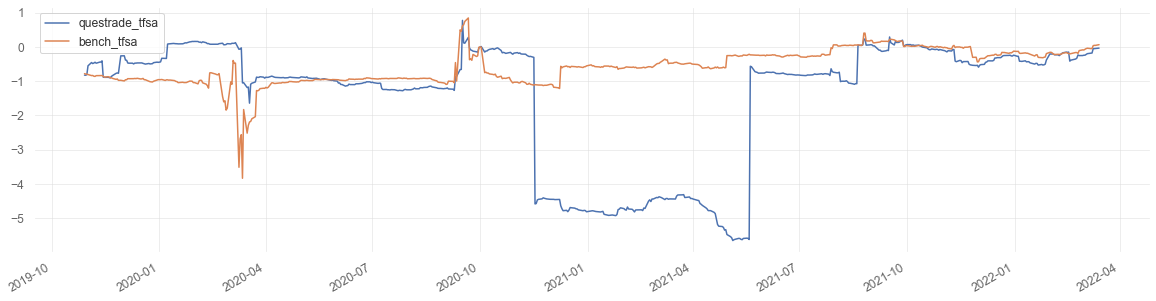

In [7]:
pyportlib.stats.rolling_skew(ptf_rets, lookback=lookback, rolling_period=rolling).plot(legend=True, figsize=(20,5))
pyportlib.stats.rolling_skew(bench_rets, lookback=lookback, rolling_period=rolling).plot(legend=True, figsize=(20,5))

## Rolling Annualized Volatility

2022-03-14 17:28:31,383:ERROR:no data for BPY.UN.TO, pnl not computed: in daily_pnl


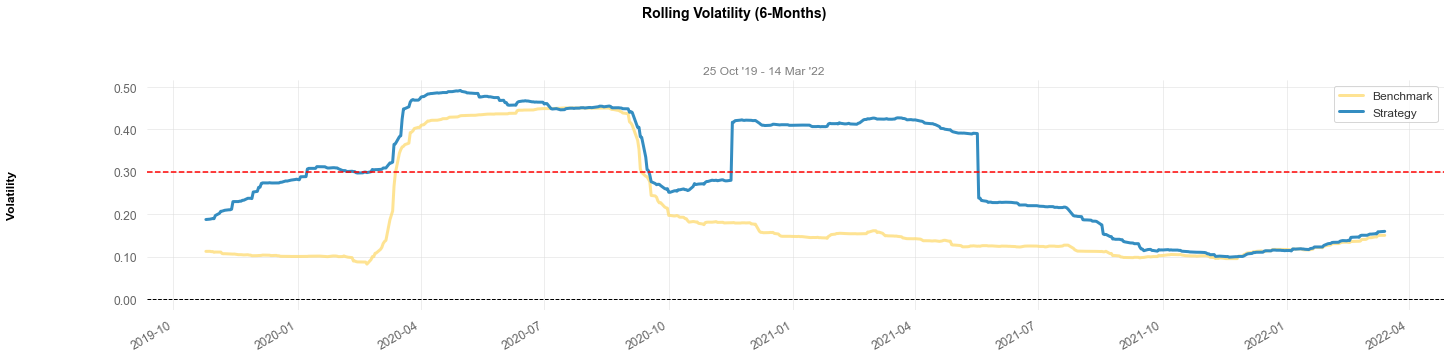

In [8]:
pyportlib.plots.rolling_vol(ptf, lookback=lookback, benchmark=benchmark, figsize=(20,5), lw=3)

## Per Position Volatility
#### of every position ever traded in portfolio

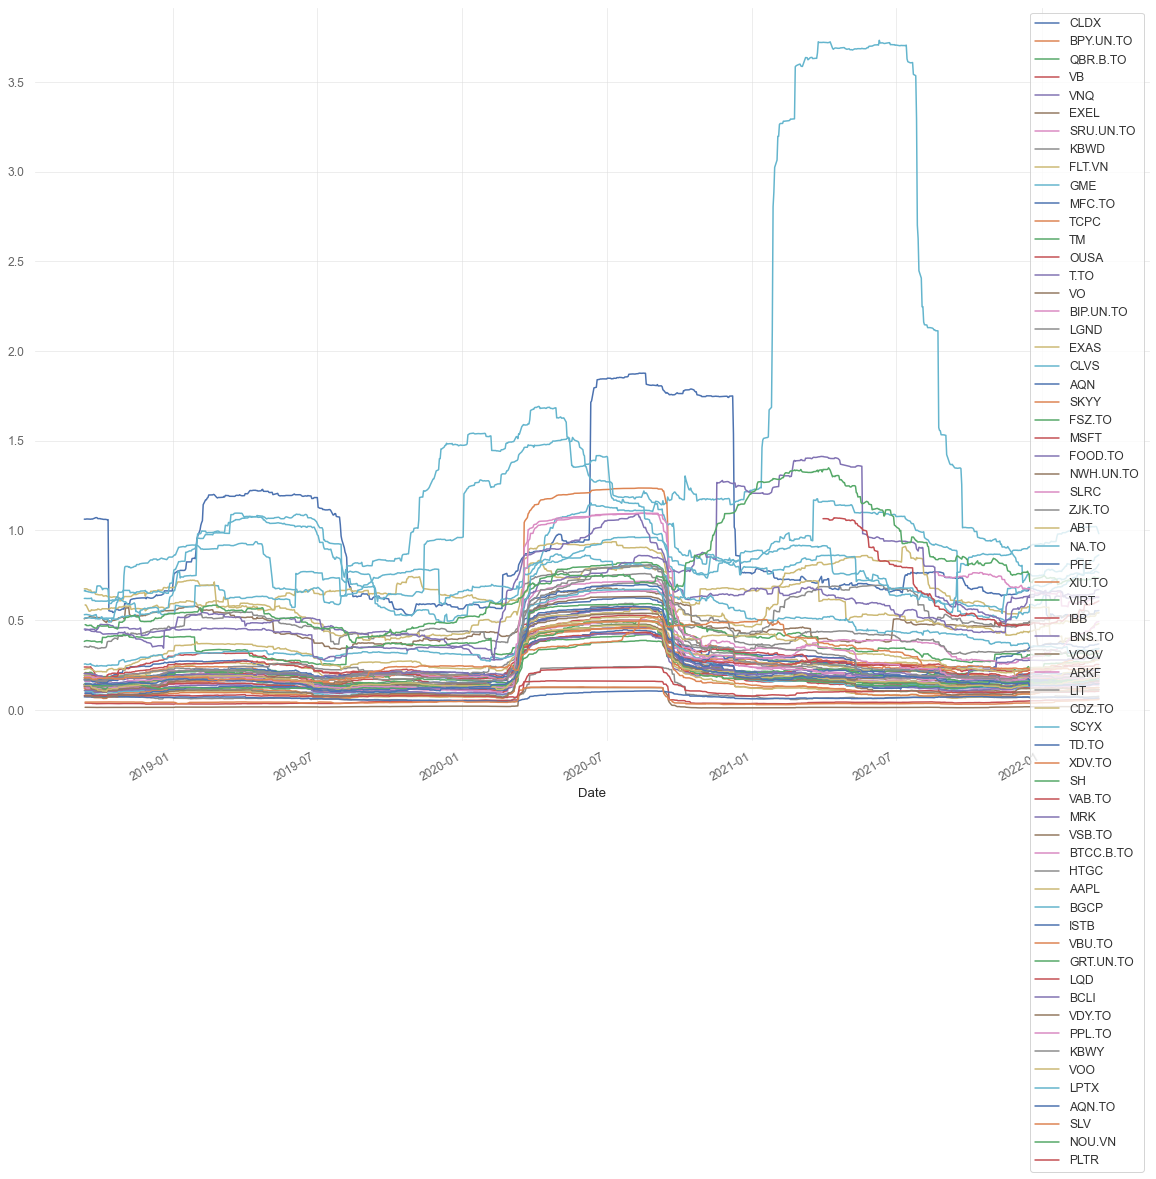

In [9]:
import pandas as pd
rolling_vol = []
for pos in ptf.positions.values():
    roll = pyportlib.stats.rolling_volatility(pos, lookback=lookback, rolling_period=rolling)
    roll.plot(legend=True, figsize = (20, 15))
    rolling_vol.append(roll)

rolling_vol = pd.concat(rolling_vol, axis=1)

## Most Volatile Positions

In [10]:
most_vol = rolling_vol.loc[:,[(rolling_vol[col] > 0.8).any() for col in rolling_vol.columns]]

## Computing positions that contribute the most to portfolio volatility

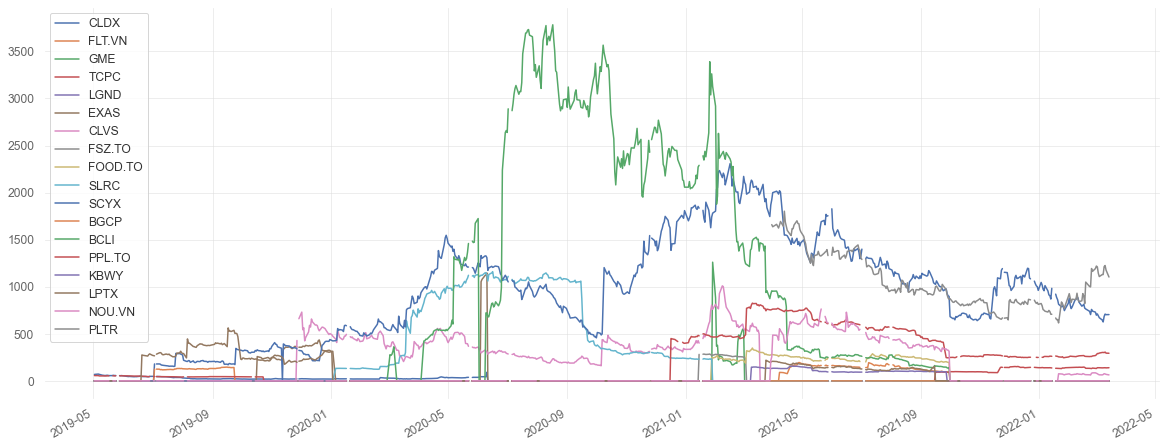

In [11]:
for col in most_vol.columns:
    pos = ptf.positions.get(col)
    pond_vol = (most_vol[col] * pos.quantities * pos.prices)
    pond_vol.name = col
    pond_vol.plot(legend=True, figsize=(20,8))

## All positions historic contribution to portfolio volatility

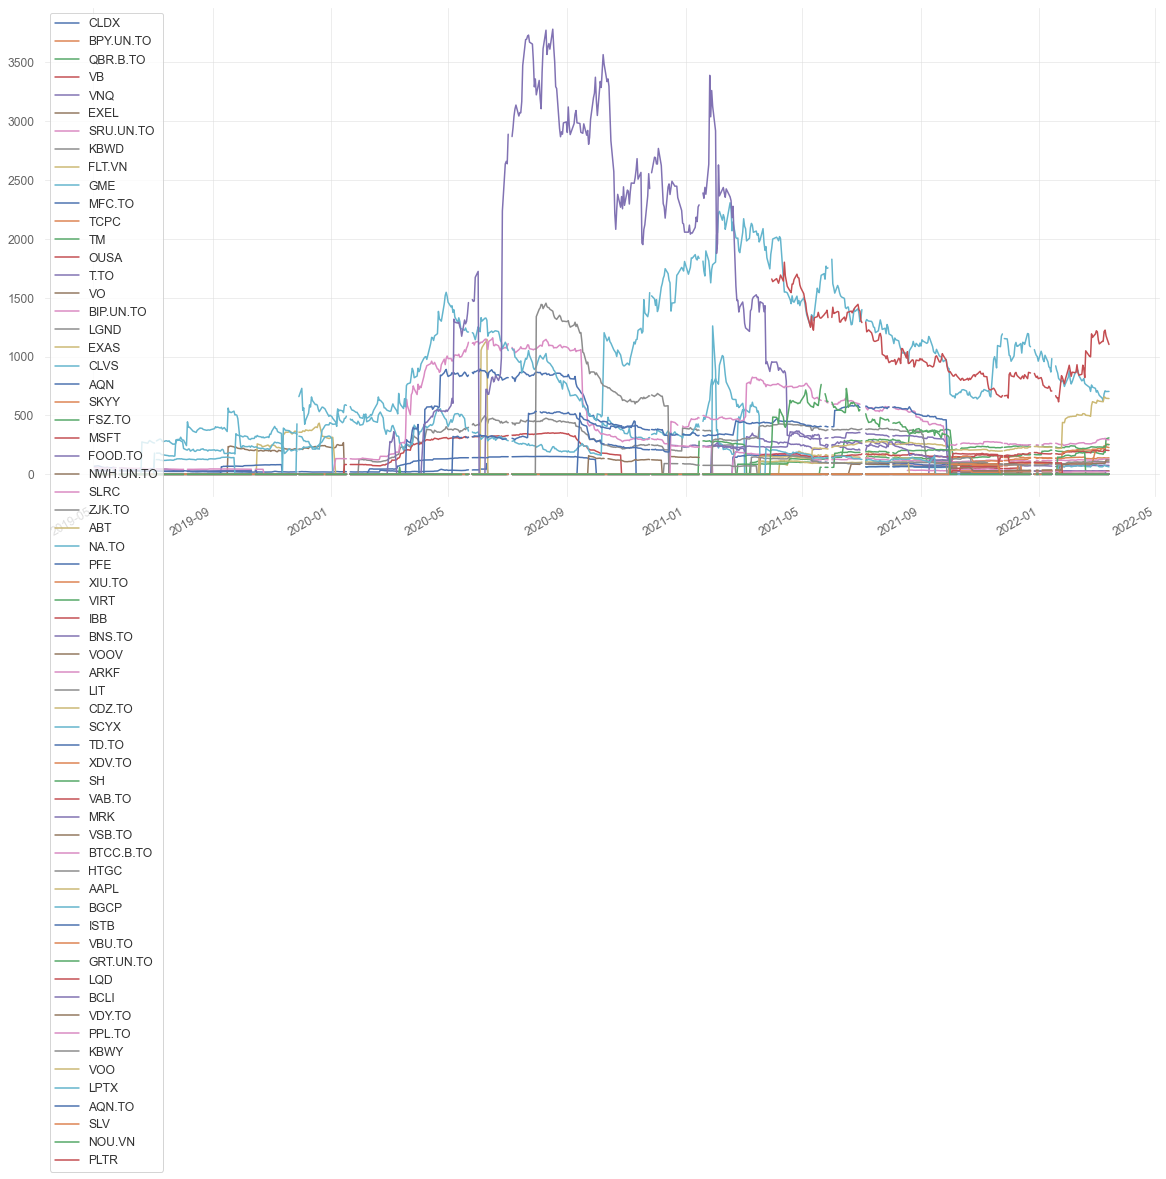

In [12]:
for pos in ptf.positions.values():
    pond_vol = (rolling_vol[pos.ticker] * pos.quantities * pos.prices)
    pond_vol.name = pos.ticker
    pond_vol.plot(legend=True, figsize=(20,10))

## Correlations

<AxesSubplot:>

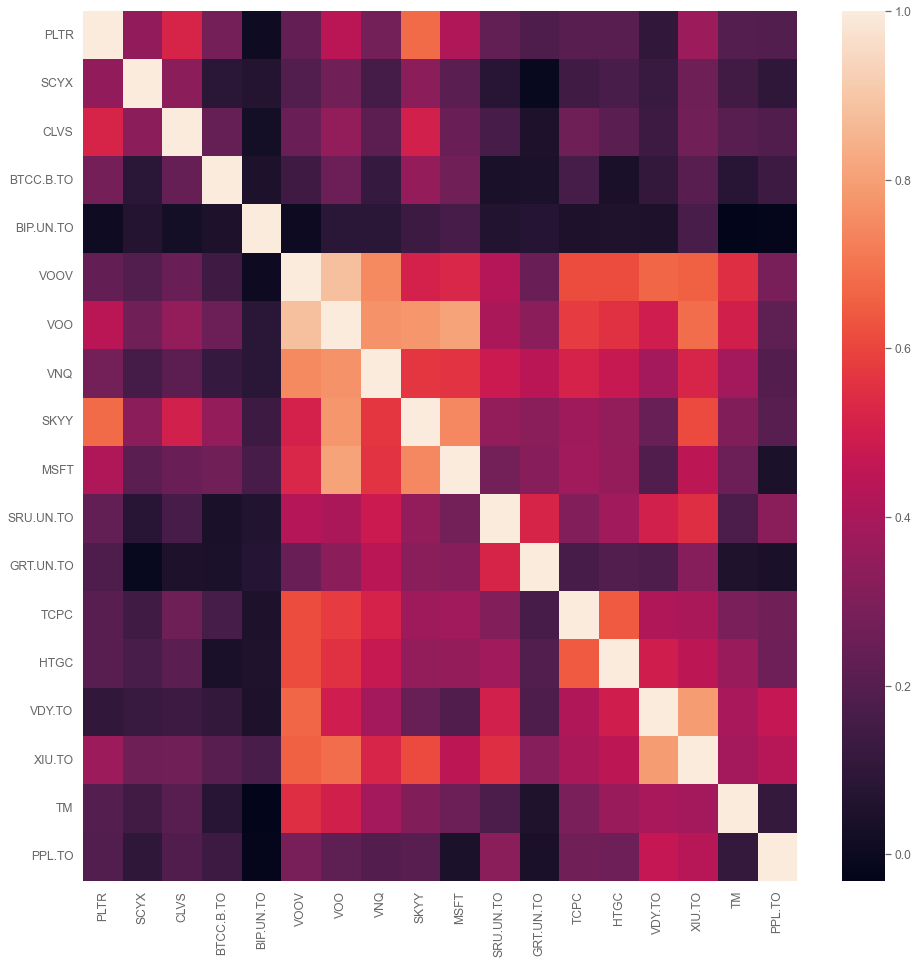

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (16,16))
sns.heatmap(pyportlib.stats.cluster_corr(ptf.corr()))